In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# load yen trade data
yen_futures = pd.read_csv("../Resources/yen.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# slice to 1/1/1990 & later
yen_futures = yen_futures.loc["1990-01-01":, :]
# yen_futures.head()

<AxesSubplot:xlabel='Date'>

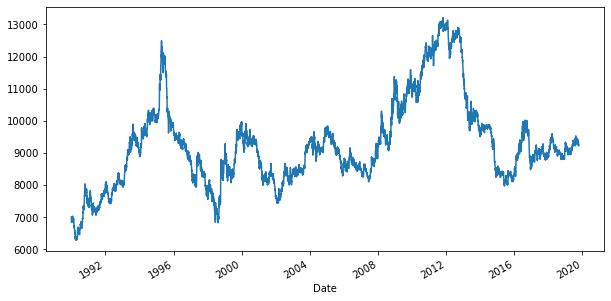

In [4]:
# Plot settle price & note lt/st patterns
yen_futures.Settle.plot(figsize=(10,5))

The settle price longterm appears to have a set pattern of a major spike followed by two smaller spikes. If this pattern continues, the settle price would be due in the short term for a major upspike.

In [5]:
# Decomp noise & trend for Settle price with HP filter
import statsmodels.api as sm

ts_noise, ts_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])
settle_v_hp = yen_futures["Settle"].to_frame()
settle_v_hp["noise"] = ts_noise
settle_v_hp["trend"] = ts_trend

<AxesSubplot:xlabel='Date'>

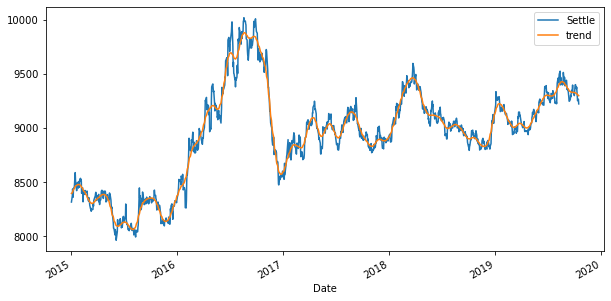

In [6]:
# Settle v Trend 2015-present
settle_v_trend = settle_v_hp.loc["2015":, :]
settle_v_trend.drop(columns="noise").plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

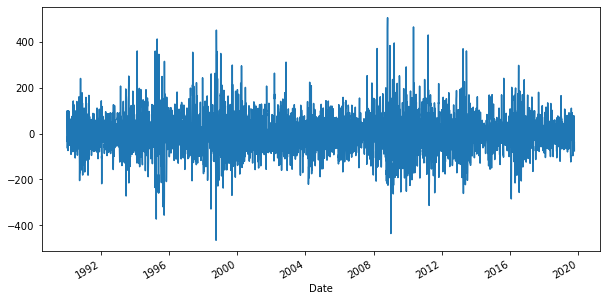

In [7]:
# plot noise
ts_noise.plot(figsize=(10,5))

In [8]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [9]:

# Estimate and ARMA model using statsmodels (use order=(2, 1))
model = sm.tsa.ARMA(returns, order=(2,1))

# Fit the model and assign it to a variable called results
results = model.fit()

C:\Users\Jordan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jordan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

In [10]:
results.summary()
# p values are high, indicating model is not good

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Settle   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Wed, 19 May 2021   AIC                          15798.142
Time:                        12:06:44   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.Settle    -0.3061      1.278     -0.240      0.811      -2.810       2.198
ar.L2.Settle    -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.Settle     0.2945      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3367           +0.0000j            3.3367            0.5000
AR.2         -157.2576           +0.0000j          157.2576            0.5000
MA.1           -3.3957           +0.0000j            3.3957            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'% days Returns Forecast'}>

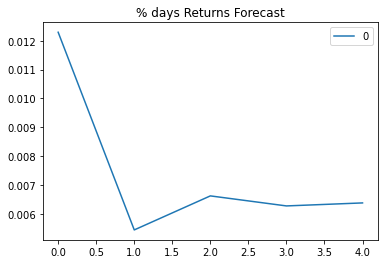

In [13]:
# plot 5d returns
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="% days Returns Forecast")

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [14]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(yen_futures[["Settle"]], order = (5,1,1))
results_arima = arima_model.fit()

C:\Users\Jordan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jordan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

In [15]:
results_arima.summary()
# again based on p-values, model is not a good fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Wed, 19 May 2021   AIC                          83905.238
Time:                        12:19:42   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3159      0.700      0.451      0.652      -1.056       1.688
ar.L1.D.Settle     0.2819      0.699      0.403      0.687      -1.089       1.653
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0127      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.065      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2969      0.699     -0.425      0.671      -1.668       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8914           -1.3789j            2.3407           -0.1003
AR.2            1.8914           +1.3789j            2.3407            0.1003
AR.3           -2.2684           -3.0217j            3.7784           -0.3525
AR.4           -2.2684           +3.0217j            3.7784            0.3525
AR.5          -11.0153           -0.0000j           11.0153           -0.5000
MA.1            3.3679           +0.0000j            3.3679            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 days Returns Forecast'}>

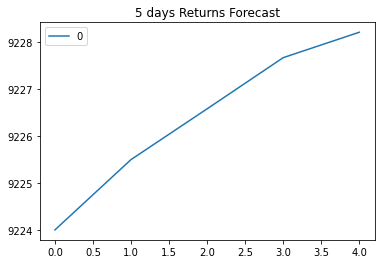

In [16]:
pd.DataFrame(results_arima.forecast(steps=5)[0]).plot(title="5 days Returns Forecast")

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [18]:
import arch

In [20]:
garch_model = arch.arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
garch_results = garch_model.fit(disp="off")

In [21]:
garch_results.summary()
# from p-values, model performance is ok overall 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Wed, May 19 2021   Df Residuals:                     7514
Time:                        12:28:59   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [24]:
last_day = returns.index.max().strftime('%Y-%m-%d')
# Create a 5 day forecast of EUR to USD exchange rate volatility
forecast_horizon = 5
# Take the last day of the data we used above. 
forecasts = garch_results.forecast(start=last_day, horizon=forecast_horizon)

C:\Users\Jordan\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'5 days Volatility Forecast'}>

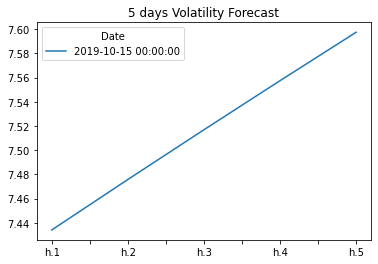

In [26]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
final = intermediate.dropna().T
final.plot(title="5 days Volatility Forecast")

# Conclusion

    1. I would buy yen now because the ARIMA model shows increase in returns.
    2. Risk is expected to increase in the near future.
    3. I would not feel confident using these models for trading, since the ARMA and ARIMA models are not significant on the .05 scale